<a href="https://colab.research.google.com/github/acg12/imdb-50k-reviews-sentiment-analysis/blob/main/Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gaussian Naive Bayes with TF-IDF Vectorizer

## Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import math

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_curve,auc, precision_recall_curve, roc_auc_score
from sklearn.base import BaseEstimator, TransformerMixin
import scipy

In [ ]:
df = pd.read_csv('/kaggle/input/imdb-dataset-of-50k-movie-reviews-clean/clean_reviews.csv')

In [ ]:
df.head()

,clean_reviews,sentiment
0,one reviewers mentioned watching 1 oz episode ...,positive
1,wonderful little production filming technique ...,positive
2,thought wonderful way spend time hot summer we...,positive
3,basically family little boy jake thinks zombie...,negative
4,mattei love time money visually stunning film ...,positive


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   clean_reviews  50000 non-null  object
 1   sentiment      50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


## Transform sentiment to integer

In [ ]:
df.loc[df['sentiment'] == 'negative', 'sentiment'] = 0
df.loc[df['sentiment'] == 'positive', 'sentiment'] = 1
df['sentiment'] = df['sentiment'].astype('int32')

## Splitting Dataset

In [ ]:
X = df['clean_reviews']
y = df['sentiment']
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y,
                                                              random_state=42,
                                                              test_size=0.2,
                                                              stratify=y)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full,
                                                      y_train_full,
                                                      random_state=42,
                                                      test_size=0.2,
                                                      stratify=y_train_full)

In [ ]:
print(f'X_train: {X_train.shape}')
print(f'X_valid: {X_valid.shape}')
print(f'X_test: {X_test.shape}')
print(f'y_train: {y_train.shape}')
print(f'y_valid: {y_valid.shape}')
print(f'y_test: {y_test.shape}')

X_train: (32000,)
X_valid: (8000,)
X_test: (10000,)
y_train: (32000,)
y_valid: (8000,)
y_test: (10000,)


## TF-IDF Vectorizer

In [ ]:
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_valid_tfidf = vectorizer.transform(X_valid)
X_test_tfidf = vectorizer.transform(X_test)

## Model: Gaussian Naive Bayes

In [ ]:
model_GNB = GaussianNB()
model_GNB.fit(X_train_tfidf.toarray(), y_train)

GaussianNB()

## Prediction: Gaussian Naive Bayes

In [ ]:
pred_GNB = model_GNB.predict(X_valid_tfidf.toarray())
pred_proba_GNB = model_GNB.predict_proba(X_valid_tfidf.toarray())

## Evaluation: Gaussian Naive Bayes

In [ ]:
def plot_conf_matrix(TRUTH_VALUE, pred, model_name):
  cf = confusion_matrix(TRUTH_VALUE, pred)
  ax = sns.heatmap(cf, annot=True, linewidth=0.1)

  ax.set_title('Confusion Matrix of '+model_name)
  ax.set_xlabel('Prediction Values')
  ax.set_ylabel('Actual Values')

  ax.xaxis.set_ticklabels(['False','True'])
  ax.yaxis.set_ticklabels(['False','True'])

  plt.show()

In [ ]:
def plot_roc(model, TRUTH_VALUE, model_name, X):
  pred_proba = model.predict_proba(X)[::,1]
  fpr,tpr,threshold = roc_curve(TRUTH_VALUE, pred_proba)

  plt.plot(fpr, tpr,
           label='AUC = '+str(roc_auc_score(TRUTH_VALUE, pred_proba)))
  plt.plot([0,1], ls='--')
  plt.plot([0,0], [1,0], c='.7'), plt.plot([1,1], c='.7')
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')
  plt.title('ROC Curve for '+model_name)
  plt.legend(loc='lower right')
  plt.show()


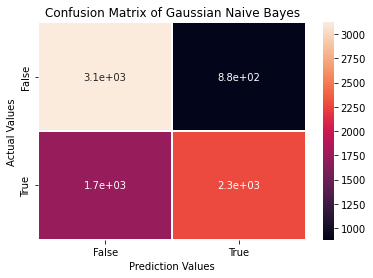

In [ ]:
plot_conf_matrix(y_valid, pred_GNB, 'Gaussian Naive Bayes')

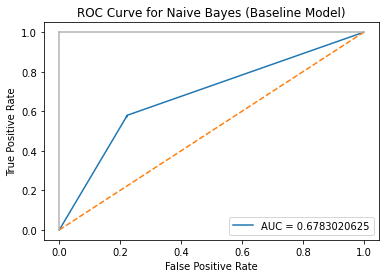

In [ ]:
plot_roc(model_GNB, y_valid, 'Naive Bayes (Baseline Model)', X_valid_tfidf.toarray())

In [ ]:
print(f'\nClassification Score:\n {classification_report(y_valid, pred_GNB)}')


Classification Score:
               precision    recall  f1-score   support

           0       0.64      0.78      0.71      4000
           1       0.72      0.57      0.64      4000

    accuracy                           0.67      8000
   macro avg       0.68      0.67      0.67      8000
weighted avg       0.68      0.67      0.67      8000



## Unseen Dataset

Gaussian Naive bayes

Classification Score:
               precision    recall  f1-score   support

           0       0.64      0.78      0.70      5000
           1       0.72      0.57      0.64      5000

    accuracy                           0.67     10000
   macro avg       0.68      0.67      0.67     10000
weighted avg       0.68      0.67      0.67     10000



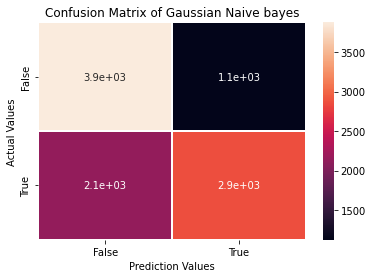

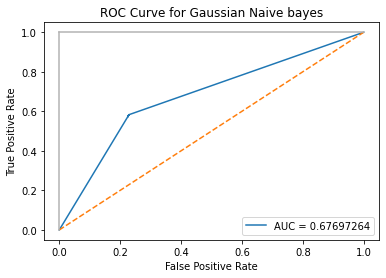

In [ ]:
unseen_pred = model_GNB.predict(X_test_tfidf.toarray())
model_name = 'Gaussian Naive bayes'
print('=====================================')
print(model_name)
print('=====================================')

# Classification Report
print(f'\nClassification Score:\n {classification_report(y_test, unseen_pred)}')

# Confusion Matrix
plot_conf_matrix(y_test, unseen_pred, model_name)

# ROC Curve
pred_proba_unseen = model_GNB.predict_proba(X_test_tfidf.toarray())[::,1]
fpr,tpr,threshold = roc_curve(y_test, pred_proba_unseen)

plt.plot(fpr, tpr,
           label='AUC = '+str(roc_auc_score(y_test, pred_proba_unseen)))
plt.plot([0,1], ls='--')
plt.plot([0,0], [1,0], c='.7'), plt.plot([1,1], c='.7')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve for '+model_name)
plt.legend(loc='lower right')
plt.show()
print('=====================================')
print('\n')

## Grid Searching

### DenseTransformer
Transform the X after going through tfidf to be dense matrix

In [ ]:
class DenseTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        return scipy.sparse.csr_matrix(X).toarray()

In [ ]:
# perform grid search
pipe = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('to_dense', DenseTransformer()),
    ('classifier', GaussianNB())
])

param_grid = {
    'tfidf__ngram_range': [(1,1), (1,2), (1,3)],
    'tfidf__max_features': [100, 500],
    'tfidf__min_df': [5, 10],
    'tfidf__max_df':[0.1,0.5]
}
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy',return_train_score=True)
grid.fit(X_train, y_train)
print("Best parameters: ", grid.best_params_)
print("Best score: ", grid.best_score_)

Best parameters:  {'tfidf__max_df': 0.5, 'tfidf__max_features': 500, 'tfidf__min_df': 10, 'tfidf__ngram_range': (1, 1)}
Best score:  0.80234375


In [ ]:
import pickle

# save the model to a file
with open('grid_search_model.pkl', 'wb') as f:
    pickle.dump(grid, f)


Gaussian Naive bayes (Grid Search)

Classification Score:
               precision    recall  f1-score   support

           0       0.81      0.80      0.81      5000
           1       0.80      0.81      0.81      5000

    accuracy                           0.81     10000
   macro avg       0.81      0.81      0.81     10000
weighted avg       0.81      0.81      0.81     10000



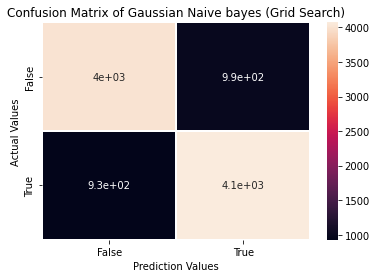

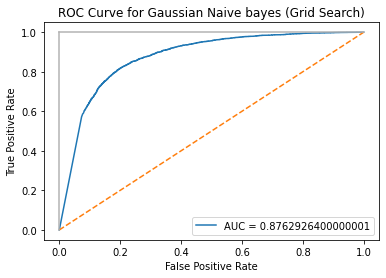

In [ ]:
unseen_pred_grid = grid.predict(X_test)
model_name = 'Gaussian Naive bayes (Grid Search)'
print('=====================================')
print(model_name)
print('=====================================')

# Classification Report
print(f'\nClassification Score:\n {classification_report(y_test, unseen_pred_grid)}')

# Confusion Matrix
plot_conf_matrix(y_test, unseen_pred_grid, model_name)

# ROC Curve
pred_proba_unseen_grid = grid.predict_proba(X_test)[::,1]
fpr,tpr,threshold = roc_curve(y_test, pred_proba_unseen_grid)

plt.plot(fpr, tpr,
           label='AUC = '+str(roc_auc_score(y_test, pred_proba_unseen_grid)))
plt.plot([0,1], ls='--')
plt.plot([0,0], [1,0], c='.7'), plt.plot([1,1], c='.7')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve for '+model_name)
plt.legend(loc='lower right')
plt.show()
print('=====================================')
print('\n')

# Final evaluations

In [ ]:
import pickle as pkl

model = pkl.load(open('/kaggle/input/imdb-dataset-of-50k-movie-reviews-clean/grid_search_model.pkl', 'rb'))


Classification Score:
               precision    recall  f1-score   support

           0       0.81      0.80      0.80     16000
           1       0.80      0.82      0.81     16000

    accuracy                           0.81     32000
   macro avg       0.81      0.81      0.81     32000
weighted avg       0.81      0.81      0.81     32000



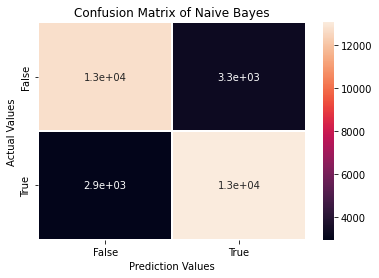

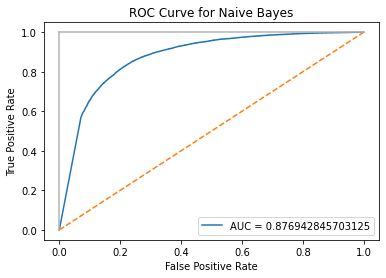

In [ ]:
# ON TRAIN DATASET

pred = model.predict(X_train)

# Classification Report
print(f'\nClassification Score:\n {classification_report(y_train, pred)}')

# Confusion Matrix
plot_conf_matrix(y_train, pred, 'Naive Bayes')

# ROC Curve
pred_proba_unseen_grid = model.predict_proba(X_train)[::,1]
fpr,tpr,threshold = roc_curve(y_train, pred_proba_unseen_grid)

plt.plot(fpr, tpr,
           label='AUC = '+str(roc_auc_score(y_train, pred_proba_unseen_grid)))
plt.plot([0,1], ls='--')
plt.plot([0,0], [1,0], c='.7'), plt.plot([1,1], c='.7')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve for Naive Bayes')
plt.legend(loc='lower right')
plt.show()
print('=====================================')
print('\n')


Classification Score:
               precision    recall  f1-score   support

           0       0.82      0.79      0.80      4000
           1       0.80      0.82      0.81      4000

    accuracy                           0.81      8000
   macro avg       0.81      0.81      0.81      8000
weighted avg       0.81      0.81      0.81      8000



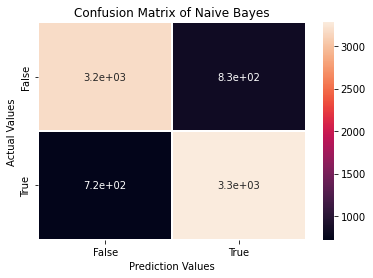

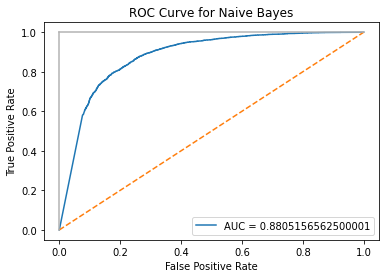

In [ ]:
# ON VALIDATION DATASET

pred = model.predict(X_valid)

# Classification Report
print(f'\nClassification Score:\n {classification_report(y_valid, pred)}')

# Confusion Matrix
plot_conf_matrix(y_valid, pred, 'Naive Bayes')

# ROC Curve
pred_proba_unseen_grid = model.predict_proba(X_valid)[::,1]
fpr,tpr,threshold = roc_curve(y_valid, pred_proba_unseen_grid)

plt.plot(fpr, tpr,
           label='AUC = '+str(roc_auc_score(y_valid, pred_proba_unseen_grid)))
plt.plot([0,1], ls='--')
plt.plot([0,0], [1,0], c='.7'), plt.plot([1,1], c='.7')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve for Naive Bayes')
plt.legend(loc='lower right')
plt.show()
print('=====================================')
print('\n')


Classification Score:
               precision    recall  f1-score   support

           0       0.81      0.80      0.81      5000
           1       0.80      0.81      0.81      5000

    accuracy                           0.81     10000
   macro avg       0.81      0.81      0.81     10000
weighted avg       0.81      0.81      0.81     10000



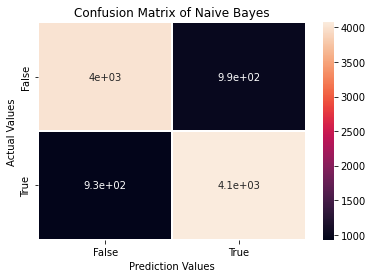

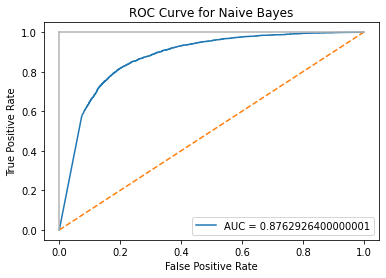

In [ ]:
# ON TEST DATASET

pred = model.predict(X_test)

# Classification Report
print(f'\nClassification Score:\n {classification_report(y_test, pred)}')

# Confusion Matrix
plot_conf_matrix(y_test, pred, 'Naive Bayes')

# ROC Curve
pred_proba_unseen_grid = model.predict_proba(X_test)[::,1]
fpr,tpr,threshold = roc_curve(y_test, pred_proba_unseen_grid)

plt.plot(fpr, tpr,
           label='AUC = '+str(roc_auc_score(y_test, pred_proba_unseen_grid)))
plt.plot([0,1], ls='--')
plt.plot([0,0], [1,0], c='.7'), plt.plot([1,1], c='.7')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve for Naive Bayes')
plt.legend(loc='lower right')
plt.show()
print('=====================================')
print('\n')